In [79]:
import numpy as np
import pandas as pd

In [80]:
trans = pd.DataFrame({"A":[12, 4, 5, None, 1], 
                      "B":[7,2,54,3, None],
                      "C":[20,16,11,3,8],
                      "D":[14,3,None,2,6]},
                      index=['Row_1','Row_2','Row_3','Row_4','Row_5'])
trans

,A,B,C,D
Row_1,12.0,7.0,20,14.0
Row_2,4.0,2.0,16,3.0
Row_3,5.0,54.0,11,NaN
Row_4,NaN,3.0,3,2.0
Row_5,1.0,NaN,8,6.0


In [81]:
result = trans.transform(lambda x : x + 10)
result

,A,B,C,D
Row_1,22.0,17.0,30,24.0
Row_2,14.0,12.0,26,13.0
Row_3,15.0,64.0,21,NaN
Row_4,NaN,13.0,13,12.0
Row_5,11.0,NaN,18,16.0


In [82]:
result2 = trans.transform([np.sqrt, np.exp])
result2

A                        B                       C  \
           sqrt            exp      sqrt           exp      sqrt   
Row_1  3.464102  162754.791419  2.645751  1.096633e+03  4.472136   
Row_2  2.000000      54.598150  1.414214  7.389056e+00  4.000000   
Row_3  2.236068     148.413159  7.348469  2.830753e+23  3.316625   
Row_4       NaN            NaN  1.732051  2.008554e+01  1.732051   
Row_5  1.000000       2.718282       NaN           NaN  2.828427   

                            D                
                exp      sqrt           exp  
Row_1  4.851652e+08  3.741657  1.202604e+06  
Row_2  8.886111e+06  1.732051  2.008554e+01  
Row_3  5.987414e+04       NaN           NaN  
Row_4  2.008554e+01  1.414214  7.389056e+00  
Row_5  2.980958e+03  2.449490  4.034288e+02

In [83]:
# 10 random numbers from 10-200
x = np.random.randint(10, 200, size=10)
x

array([153,  99,  62,  55,  46, 114,  84,  25,  83, 102])

In [84]:
np.digitize(x,bins=[50])


array([1, 1, 1, 1, 0, 1, 1, 0, 1, 1])

In [85]:
np.digitize(x,bins=[50,100])

array([2, 1, 1, 1, 0, 2, 1, 0, 1, 2])

In [86]:
df = pd.DataFrame({"height": x})
df

,height
0,153
1,99
2,62
3,55
4,46
5,114
6,84
7,25
8,83
9,102


In [90]:
df['binned'] = pd.cut(x=df['height'], bins=[0,25,50,100,200])
df

,height,bin_label,binned
0,153,4,"(100, 200]"
1,99,3,"(50, 100]"
2,62,3,"(50, 100]"
3,55,3,"(50, 100]"
4,46,2,"(25, 50]"
5,114,4,"(100, 200]"
6,84,3,"(50, 100]"
7,25,1,"(0, 25]"
8,83,3,"(50, 100]"
9,102,4,"(100, 200]"


In [87]:
df['bin_label'] = pd.cut(x = df['height'],
                        bins = [0,25,50,100,200],
                        labels = [1,2,3,4])
df

,height,bin_label
0,153,4
1,99,3
2,62,3
3,55,3
4,46,2
5,114,4
6,84,3
7,25,1
8,83,3
9,102,4


In [88]:
pd.qcut(df['height'],q=5)

0    (104.4, 153.0]
1     (90.0, 104.4]
2      (53.2, 74.6]
3      (53.2, 74.6]
4    (24.999, 53.2]
5    (104.4, 153.0]
6      (74.6, 90.0]
7    (24.999, 53.2]
8      (74.6, 90.0]
9     (90.0, 104.4]
Name: height, dtype: category
Categories (5, interval[float64]): [(24.999, 53.2] < (53.2, 74.6] < (74.6, 90.0] < (90.0, 104.4] < (104.4, 153.0]]

In [89]:
degrees = ["none", "cum laude", "magna cum laude", "summa cum laude"]
student_results = [3.93, 3.24, 2.80, 2.83, 3.91, 3.698, 3.731, 3.25, 3.24, 3.82, 3.22]
student_results.sort(reverse=True)

student_results_degrees = pd.cut(student_results, [0, 3.6, 3.8, 3.9, 4.0], labels=degrees)
honor = pd.DataFrame({'grades': student_results, 
                      'honors': student_results_degrees})
honor


,grades,honors
0,3.930,summa cum laude
1,3.910,summa cum laude
2,3.820,magna cum laude
3,3.731,cum laude
4,3.698,cum laude
5,3.250,none
6,3.240,none
7,3.240,none
8,3.220,none
9,2.830,none


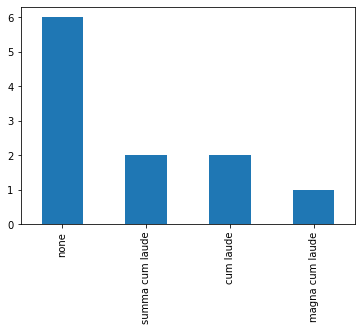

In [91]:
pd.value_counts(student_results_degrees).plot.bar()